<H1> Library and Module Import </H1>

In [2]:
#import
import numpy as np
from numpy import *
import timeit
import matplotlib.cm as cm
import pandas as pd
import os
import matplotlib.pyplot as plt
import sklearn
import sklearn.metrics as sm
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from itertools import *
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score


<H1> Data Import and Preprocessing </H1>

In [3]:
#assign file name
file = 'ecg_data.csv'

#read file as df
dataframe = pd.read_csv(file, usecols=['personid','RR', 'PR', 'QRS', 'QT', 'QTc', 'P_wave_axis', 'QRS_axis', 'T_wave_axis', 'ACCI'])
dataframe['personid'] = dataframe['personid'].astype(str)
df_array = dataframe.values

#group by and aggregate
data = dataframe.groupby('personid').aggregate('mean')

#round up the data
rounded_data = data.apply(pd.Series.round)

#fill up the NaN data with zero
data = rounded_data.fillna(0)

#output to console
print(shape(data))
dataframe.head()


(23051, 9)


,personid,RR,PR,QRS,QT,QTc,P_wave_axis,QRS_axis,T_wave_axis,ACCI
0,457104,968.0,178.0,72.0,418,424,48.0,18.0,41.0,12
1,396397,652.0,126.0,96.0,324,400,29.0,50.0,35.0,10
2,106444,714.0,160.0,84.0,358,423,73.0,72.0,47.0,8
3,174857,909.0,188.0,96.0,378,396,40.0,74.0,42.0,7
4,393164,1176.0,NaN,NaN,446,411,NaN,NaN,NaN,12


<H1> Building and Running Model </H1>

In [42]:
#convert dataframe to np
data_num = data.values
data_head = data.index.values

#scale data with standard scaler and transform
scaler = preprocessing.StandardScaler().fit(data_num)
transformed_data = scaler.transform(data_num)

#run clustering model
clustering = KMeans(n_clusters = 9, random_state = 5).fit(transformed_data)

#determine centroids
centroids = clustering.cluster_centers_
print(centroids)
#print(transformed_data)


[[  7.34510559e-02  -2.36815732e+00  -2.43448524e+00   7.90457852e-02
    9.25225060e-05  -1.36825417e+00  -1.06466449e+00  -1.17051829e+00
    1.87828830e-01]
 [  1.50128702e-01   3.10138342e-01   3.24298244e-01  -1.79810475e-01
   -5.96718169e-01   5.10359720e-01   8.05008189e-01   4.29045807e-01
   -1.67447885e-01]
 [ -2.09846223e-01   4.61644248e-01   3.32073958e-01  -2.02875302e-01
   -5.32451317e-02   3.50031055e-01  -8.20172947e-01  -9.66125155e-02
    7.81781552e-01]
 [ -1.44836929e+00  -1.32815299e-02   2.58615778e-02  -1.50024982e+00
    1.48560368e-02   3.66333303e-01   7.72793459e-01   2.21272703e-01
   -1.33375953e-01]
 [ -5.17126534e-01   3.38355297e-01   4.40634872e-01   4.50477298e-01
    1.59841136e+00   4.26131109e-01   1.86098920e-01   3.00289298e-01
    6.65106735e-01]
 [  5.59654615e-01  -2.36815732e+00  -2.53825917e+00   3.84882673e-01
   -2.67958462e-01  -1.36815211e+00  -1.08044066e+00  -1.17044660e+00
   -2.05226720e+00]
 [  1.25852355e+00   4.78037053e-01   4.

<H1> Automated Data Partioning based on Cluster Value</H1>

In [44]:
#add new column for cluster
data_new = data.copy()
data_new['Cluster'] = pd.Series(clustering.labels_.tolist(), index=data_new.index)

#Sort dataframe by Cluster
sorted_by_cluster_df = data_new.sort_values(['Cluster'], ascending=True)

#automatic partioned file generate
file_suffix = 'cluster.csv'
cluster_unique = np.unique(clustering.labels_)
c_size = cluster_unique.size
if not os.path.exists(str(c_size) + 'cluster\\'):
    os.makedirs(str(c_size) + 'cluster\\')

for cluster_no in cluster_unique:
    df_clustered = sorted_by_cluster_df.loc[sorted_by_cluster_df['Cluster'] == cluster_no]
    file = str(c_size) + 'cluster\\' + cluster_no.astype(str) + file_suffix
    df_clustered.to_csv(file, sep=',', mode='w')

#Write whole sorted by cluster dataframe to a file
sorted_by_cluster_df.to_csv(str(c_size) + 'cluster\\' + 'datafile_sorted_by_cluster.csv', sep=',', mode='w')

print('File Partition Done!')


File Partition Done!


<H1> Authenticate Single User Via Clustering </H1>

In [ ]:
# #Start Time
# start_time = timeit.default_timer()

# #Predict new data's cluster
# new_ecg = [[763, 143, 83, 352, 403, 58, 66, 38, 9]]
# cluster_num = clustering.predict(scaler.transform(new_ecg))
# print('Predicted Cluster No:', cluster_num[0])

# #load cluster data
# filename = str(c_size) + 'cluster\\' + str(cluster_num[0]) + file_suffix
# auth_df = pd.read_csv(filename, usecols=['personid','RR', 'PR', 'QRS', 'QT', 'QTc', 'P_wave_axis', 'QRS_axis', 'T_wave_axis', 'ACCI']) 
# auth_df['personid'] = auth_df['personid'].astype(str)
# auth_val = auth_df.values

# #value set for gaining minimal distance and minimal id
# min_id = 'NaN'
# counter = 0

# max_conf = 0
# counter = 0
# can = 0

# for i in range(len(auth_val)):
#     prd = np.sqrt(np.sum((new_ecg - auth_val[counter, 1:])**2) / np.sum((array(new_ecg))**2)) * 100
#     cc = np.sum(new_ecg * auth_val[counter, 1:]) / np.sqrt(np.sum((array(new_ecg))**2) * np.sum((auth_val[counter, 1:])**2))
#     conf = (0.50*(100-prd)) + (0.50*cc)
#     if (prd<=14) and (cc>=0.995) and (conf >= max_conf):
#         max_conf = conf
#         min_id = auth_val[counter, 0]
#         can = can+1
#     counter = counter + 1

# print('Total Candidates:', can)   
# print('Predicted User ID No:', min_id)
# print('Confidence Score:', max_conf)

# #End Time
# single_elapsed = timeit.default_timer() - start_time
# print("Time:", single_elapsed)

<H1> Authenticate Single User Via One-to-One Match </H1>

In [ ]:
# #Start Time
# start_time = timeit.default_timer()

# #Predict new data's ID
# new_ecg = [[763, 143, 83, 352, 403, 58, 66, 38, 9]]

# filename = str(c_size) + 'cluster\\' + 'datafile_sorted_by_cluster.csv'
# auth_df_serial = pd.read_csv(filename, usecols=['personid','RR', 'PR', 'QRS', 'QT', 'QTc', 'P_wave_axis', 'QRS_axis', 'T_wave_axis', 'ACCI'] )
# auth_df_serial['personid'] = auth_df_serial['personid'].astype(str)
# auth_df_serial_val = auth_df_serial.values

# #value set for gaining minimal distance and minimal id
# min_id = 'NaN'
# counter = 0

# max_conf = 0
# counter = 0
# can = 0

# #loop through to get the minimal point
# for i in range(len(auth_df_serial_val)):
#     prd = np.sqrt(np.sum((new_ecg - auth_df_serial_val[counter, 1:])**2) / np.sum((array(new_ecg))**2)) * 100
#     cc = np.sum(new_ecg * auth_df_serial_val[counter, 1:]) / np.sqrt(np.sum((array(new_ecg))**2) * np.sum((auth_df_serial_val[counter, 1:])**2))
#     conf = (0.50*(100-prd)) + (0.50*cc)
#     if (prd<=14) and (cc>=0.995) and (conf >= max_conf):
#         max_conf = conf
#         min_id = auth_df_serial_val[counter, 0]
#         can = can+1
#     counter = counter + 1
    
# print('Total Candidates:', can)   
# print('Predicted User ID No:', min_id)
# print('Confidence Score:', max_conf)

# #End Time
# batch_elapsed = timeit.default_timer() - start_time
# print("Time:", batch_elapsed)

<H1> Time Reduction Percentage </H1>

In [38]:
# print("Time Reduction:", ((batch_elapsed - single_elapsed)/batch_elapsed)*100, "%")
data_new

,RR,PR,QRS,QT,QTc,P_wave_axis,QRS_axis,T_wave_axis,ACCI,Cluster
personid,,,,,,,,,,
10002,763.0,143.0,83.0,352.0,403.0,58.0,66.0,38.0,9.0,6
100023,771.0,165.0,91.0,371.0,424.0,58.0,38.0,34.0,5.0,6
100028,870.0,152.0,100.0,400.0,428.0,29.0,57.0,29.0,7.0,6
100055,882.0,0.0,0.0,392.0,417.0,0.0,0.0,0.0,7.0,3
100058,845.0,288.0,82.0,382.0,415.0,65.0,45.0,50.0,10.0,5
100062,811.0,118.0,102.0,356.0,395.0,42.0,57.0,35.0,0.0,6
100077,923.0,0.0,0.0,392.0,408.0,0.0,0.0,0.0,0.0,3
100124,902.0,0.0,0.0,395.0,414.0,0.0,0.0,0.0,3.0,3
10013,923.0,138.0,86.0,388.0,403.0,28.0,62.0,19.0,6.0,6


<H1> Batch Accuracy Prediction + Time Calculate (Clustering) </H1>

In [45]:
#Start Time
start_time = timeit.default_timer()

#main loop iterator
main_c = 0
accurate  = 0
inaccurate = 0

actual_cluster = []
predicted_cluster = []
actual_id = []
predicted_id = []

#loop for batch accuracy prediction for first 100 data
for index, row in data_new.iterrows():
    new_ecg = [[row['RR'], row['PR'], row['QRS'], row['QT'], row['QTc'], row['P_wave_axis'], row['QRS_axis'], row['T_wave_axis'], row['ACCI']]]
    cluster_num = clustering.predict(scaler.transform(new_ecg))

    #load cluster data
    filename = str(c_size) + 'cluster\\' + str(cluster_num[0]) + file_suffix
    auth_df = pd.read_csv(filename, usecols=['personid','RR', 'PR', 'QRS', 'QT', 'QTc', 'P_wave_axis', 'QRS_axis', 'T_wave_axis', 'ACCI']) 
    auth_df['personid'] = auth_df['personid'].astype(str)
    auth_val = auth_df.values

    #value set for gaining maximum confidence id
    min_id = 'NaN'
    max_conf = 0
    counter = 0
    can = 0

    for i in range(len(auth_val)):
        prd = np.sqrt(np.sum((new_ecg - auth_val[counter, 1:])**2) / np.sum((array(new_ecg))**2)) * 100
        cc = np.sum(new_ecg * auth_val[counter, 1:]) / np.sqrt(np.sum((array(new_ecg))**2) * np.sum((auth_val[counter, 1:])**2))
        conf = (0.50*(100-prd)) + (0.50*cc)
        if (prd<=14) and (cc>=0.995):
            if (conf >= max_conf):
                max_conf = conf
                min_id = auth_val[counter, 0]
                can = can+1
        counter = counter + 1
    
    #if-else block for accuracy measurement
    if min_id == data_new.index.values[main_c]:
        accurate = accurate + 1
    else:
        inaccurate = inaccurate + 1

    #if block for loop break
    if main_c == 99 :
        break
    main_c  = main_c + 1 

#End Time
batch_cluster_time = timeit.default_timer() - start_time
print("Time:", batch_cluster_time/100)

print("Accuracy:", (accurate/(accurate+inaccurate)*100), "%")


Time: 0.21184703382265524
Accuracy: 97.0 %


<H1> Batch Accuracy Prediction + Time Calculate (One-To-Many) </H1>

In [46]:
#Start Time
start_time = timeit.default_timer()

#main loop iterator
main_c = 0
accurate  = 0
inaccurate = 0

actual_cluster = []
predicted_cluster = []
actual_id = []
predicted_id = []

#loop for batch accuracy prediction for first 100 data
for index, row in data_new.iterrows():
    new_ecg = [[row['RR'], row['PR'], row['QRS'], row['QT'], row['QTc'], row['P_wave_axis'], row['QRS_axis'], row['T_wave_axis'], row['ACCI']]]

    #load cluster data
    filename = str(c_size) + 'cluster\\' + 'datafile_sorted_by_cluster.csv'
    auth_df = pd.read_csv(filename, usecols=['personid','RR', 'PR', 'QRS', 'QT', 'QTc', 'P_wave_axis', 'QRS_axis', 'T_wave_axis', 'ACCI']) 
    auth_df['personid'] = auth_df['personid'].astype(str)
    auth_val = auth_df.values

    #value set for gaining maximum confidence id
    min_id = 'NaN'
    max_conf = 0
    counter = 0
    can = 0

    for i in range(len(auth_val)):
        prd = np.sqrt(np.sum((new_ecg - auth_val[counter, 1:])**2) / np.sum((array(new_ecg))**2)) * 100
        cc = np.sum(new_ecg * auth_val[counter, 1:]) / np.sqrt(np.sum((array(new_ecg))**2) * np.sum((auth_val[counter, 1:])**2))
        conf = (0.50*(100-prd)) + (0.50*cc)
        if (prd<=14) and (cc>=0.995):
            if (conf >= max_conf):
                max_conf = conf
                min_id = auth_val[counter, 0]
                can = can+1
        counter = counter + 1
    
    #if-else block for accuracy measurement
    if min_id == data_new.index.values[main_c]:
        accurate = accurate + 1
    else:
        inaccurate = inaccurate + 1

    #if block for loop break
    if main_c == 99 :
        break
    main_c  = main_c + 1 

#End Time
batch_one_to_many_time = timeit.default_timer() - start_time
print("Time:", batch_one_to_many_time/100)

print("Accuracy:", (accurate/(accurate+inaccurate)*100), "%")

Time: 1.5290388270001358
Accuracy: 97.0 %


<H1> Average Time Reduction </H1>

In [47]:
print("Time Reduction:", ((batch_one_to_many_time - batch_cluster_time)/batch_one_to_many_time)*100, "%")

Time Reduction: 86.14508473677651 %


<H1> Graph Plot for Cluster VS (Accuracy-Time Reduction) </H1>

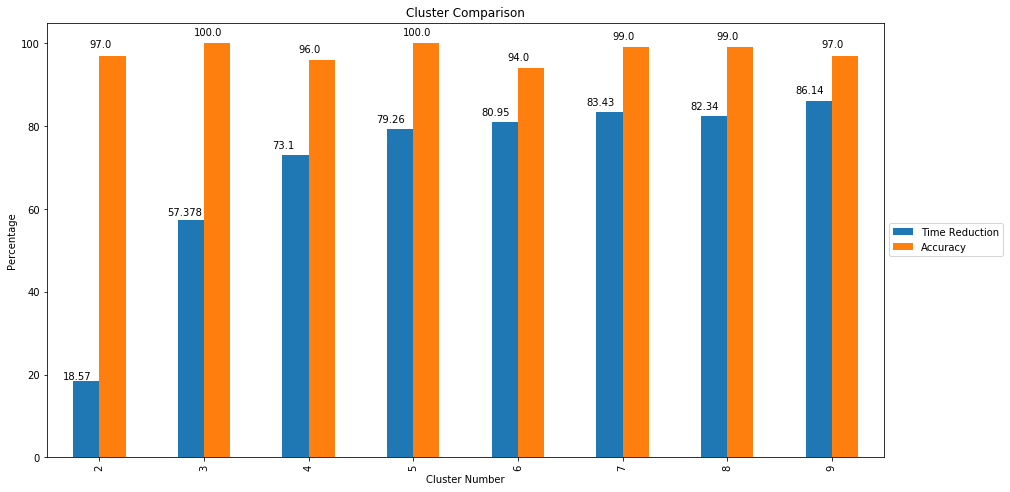

In [48]:
df = pd.DataFrame({'Cluster Number': [2, 3, 4, 5, 6, 7, 8, 9],
                   'Time Reduction': [18.57, 57.378, 73.10, 79.26, 80.95, 83.43, 82.34, 86.14],
                   'Accuracy': [97.0, 100, 96.0, 100, 94, 99, 99, 97]},
                 columns = ['Cluster Number', 'Time Reduction', 'Accuracy'])

df.index = df['Cluster Number']

ax = df[['Time Reduction','Accuracy']].plot(kind='bar', title ="Cluster Comparison", figsize=(15, 8), legend=True, fontsize=10)
ax.set_xlabel("Cluster Number", fontsize=10)
ax.set_ylabel("Percentage", fontsize=10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.1, p.get_height() * 1.02))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

fig = ax.get_figure()
#fig.savefig('Cluster Comparison.png')

<H1> Elbow Plot for Optimal Cluster Selection Based on SSQ </H1>

[2 3 4 5 6 7 8 9]


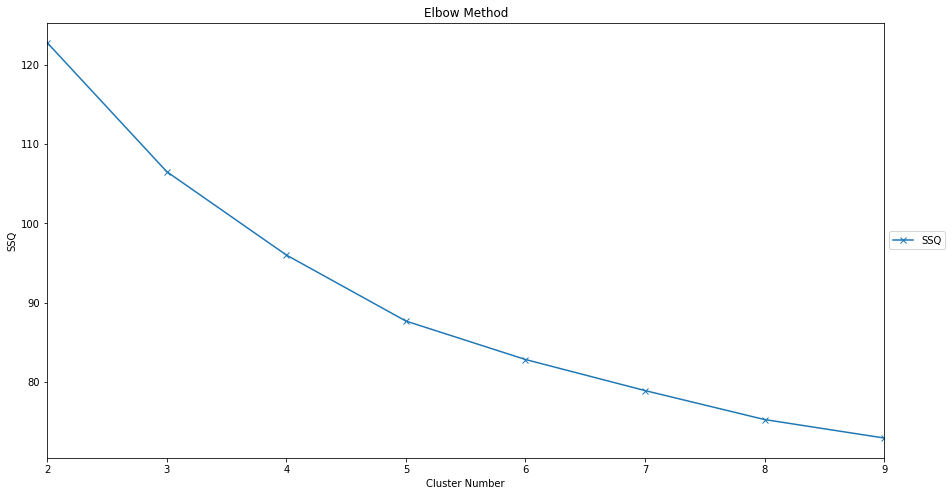

In [49]:
K = range(2,10)
data_array = data_new.values[:,:-1]
distortions = []
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data_array)
    kmeanModel.fit(data_array)
    distortions.append(sum(np.min(cdist(data_array, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data_array.shape[0])

df = pd.DataFrame({'Cluster Number': K,
                   'SSQ': distortions},
                 columns = ['Cluster Number', 'SSQ'])
df.index = df['Cluster Number']
print(df.index.values)

ax = df[['SSQ']].plot(kind='line', title ="Elbow Method", figsize=(15, 8), legend=True, fontsize=10, style='x-')
ax.set_xlabel("Cluster Number", fontsize=10)
ax.set_ylabel("SSQ", fontsize=10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.1, p.get_height() * 1.02))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

fig = ax.get_figure()
#fig.savefig('Elbow Method.png')


<H1> Optimal Cluster Selection Based on Silhouette Score </H1>

For n_clusters = 2 The average silhouette_score is : 0.394800723982


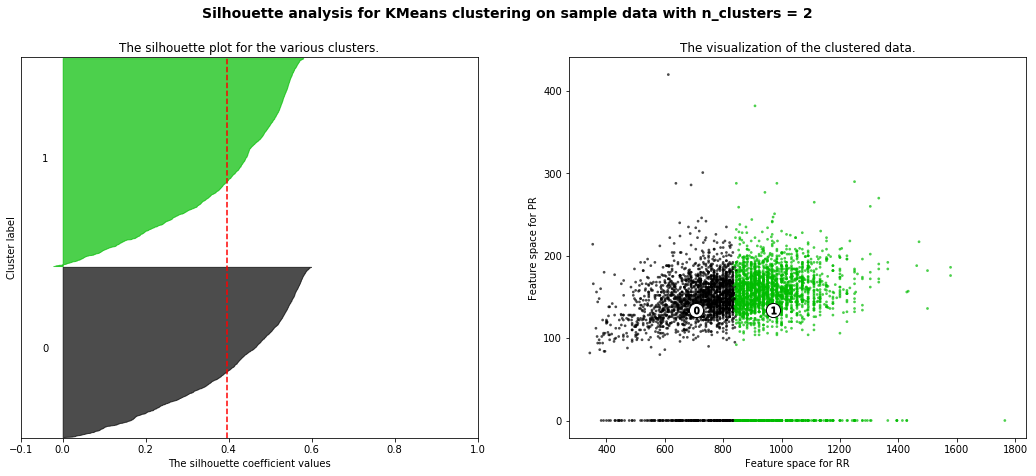

For n_clusters = 3 The average silhouette_score is : 0.316073542945


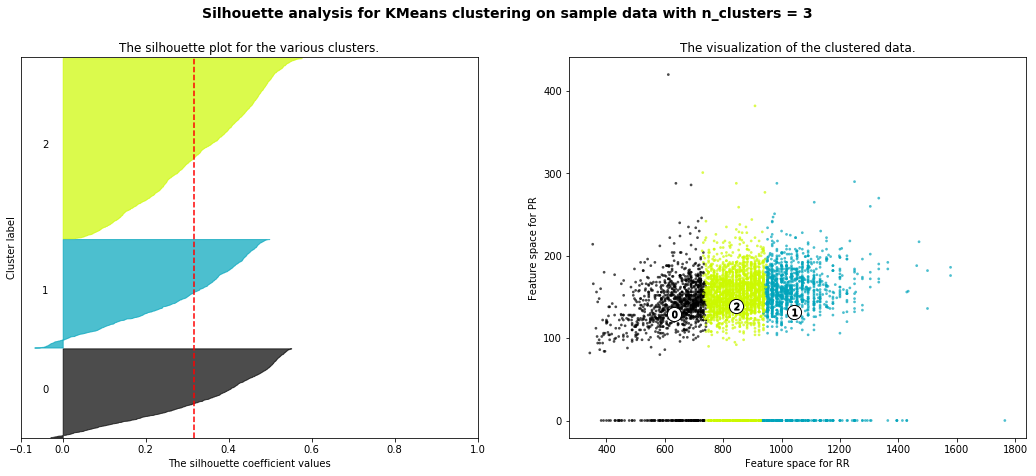

For n_clusters = 4 The average silhouette_score is : 0.355139154476


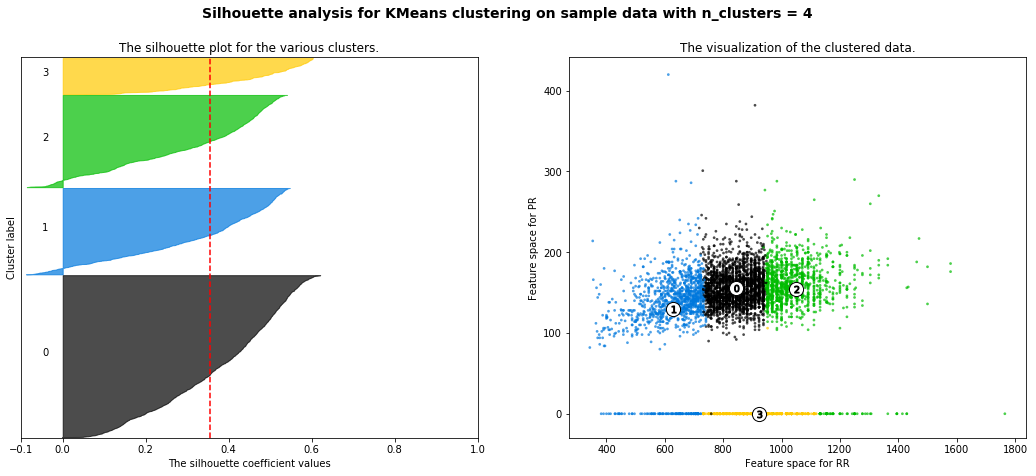

For n_clusters = 5 The average silhouette_score is : 0.324043091581


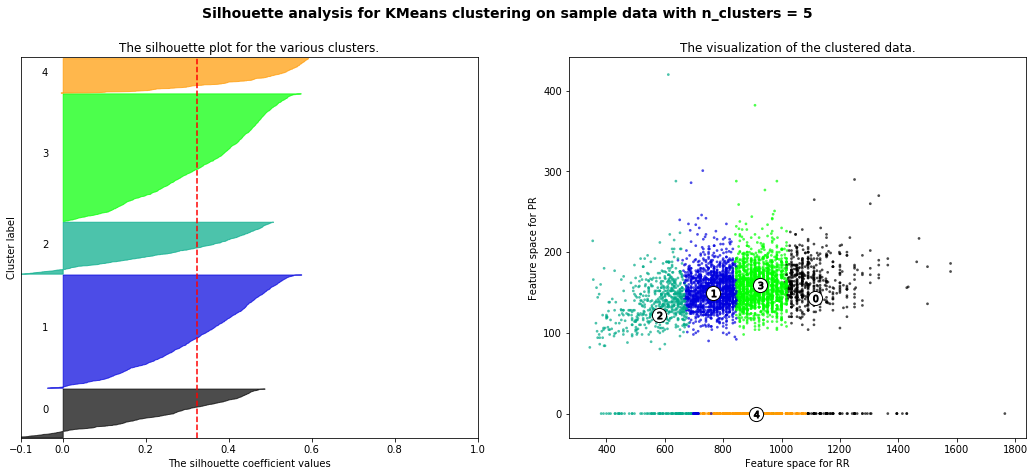

For n_clusters = 6 The average silhouette_score is : 0.282030883229


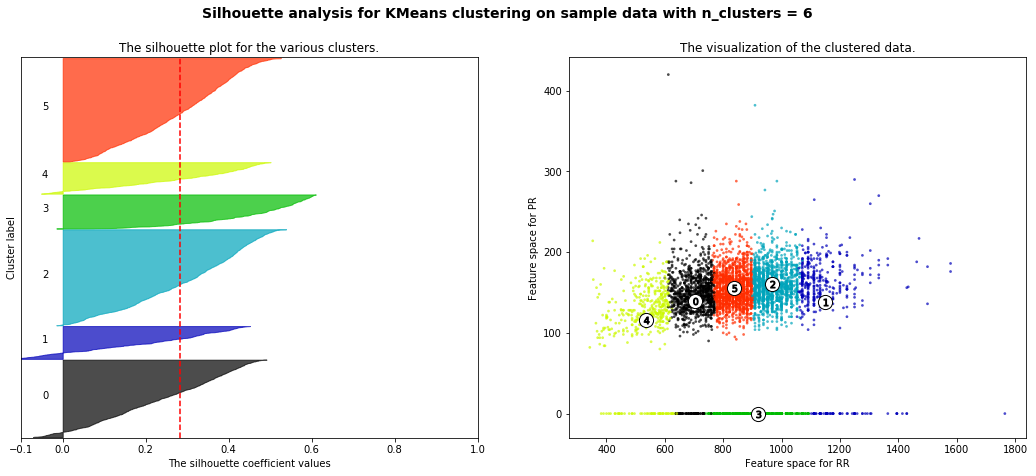

For n_clusters = 7 The average silhouette_score is : 0.291702416584


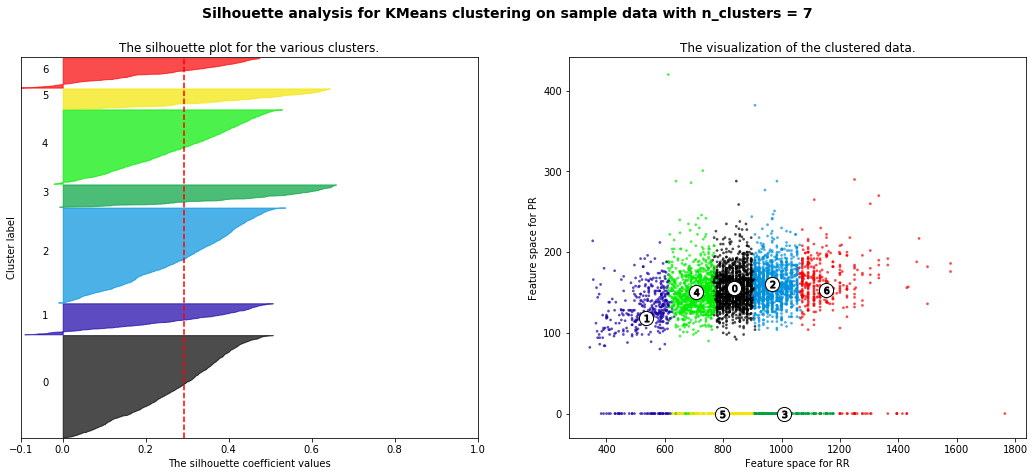

For n_clusters = 8 The average silhouette_score is : 0.279313210845


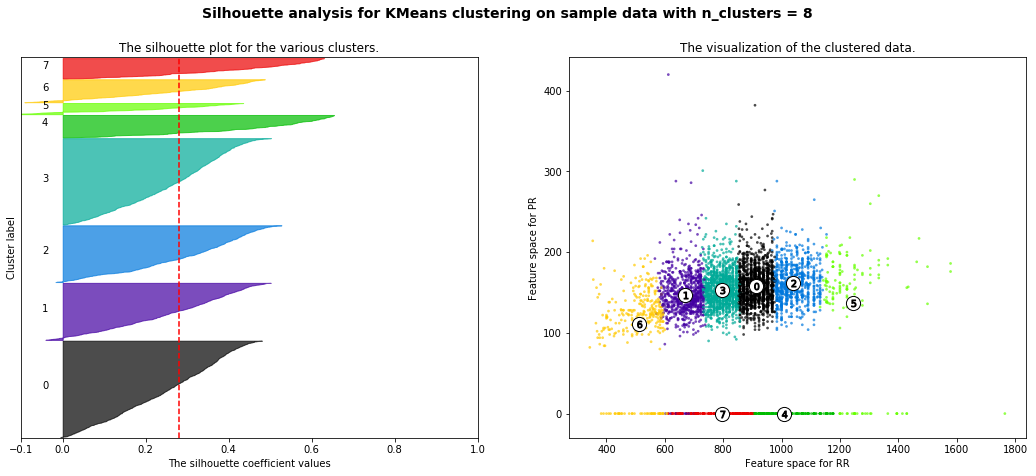

For n_clusters = 9 The average silhouette_score is : 0.24512031416


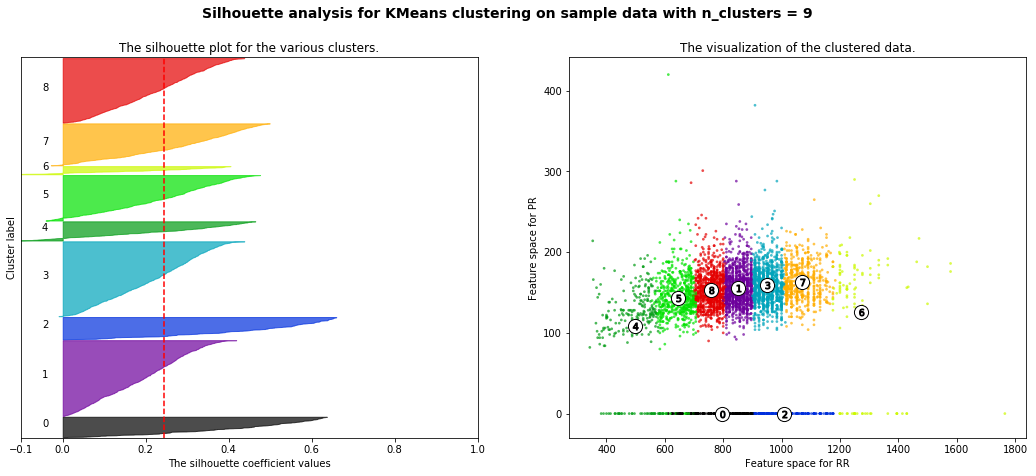

In [51]:
data_array = data_new.values[:5001,:-1]
range_n_clusters = range(2,10)
silhouette_score_avg = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_array) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_array)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_array, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    silhouette_score_avg.append(silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_array, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_array[:, 0], data_array[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for RR")
    ax2.set_ylabel("Feature space for PR")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    fig2 = ax2.get_figure()
    #fig2.savefig('Sil + Vis' + str(n_clusters) + '.png')


In [52]:
silhouette_score_avg

[0.39480072398155108,
 0.31607354294532813,
 0.35513915447576849,
 0.3240430915807504,
 0.28203088322919045,
 0.29170241658381679,
 0.2793132108449321,
 0.24512031415962127]

<h1> Silhouette Score VS Cluster Values </h1>

[2 3 4 5 6 7 8 9]


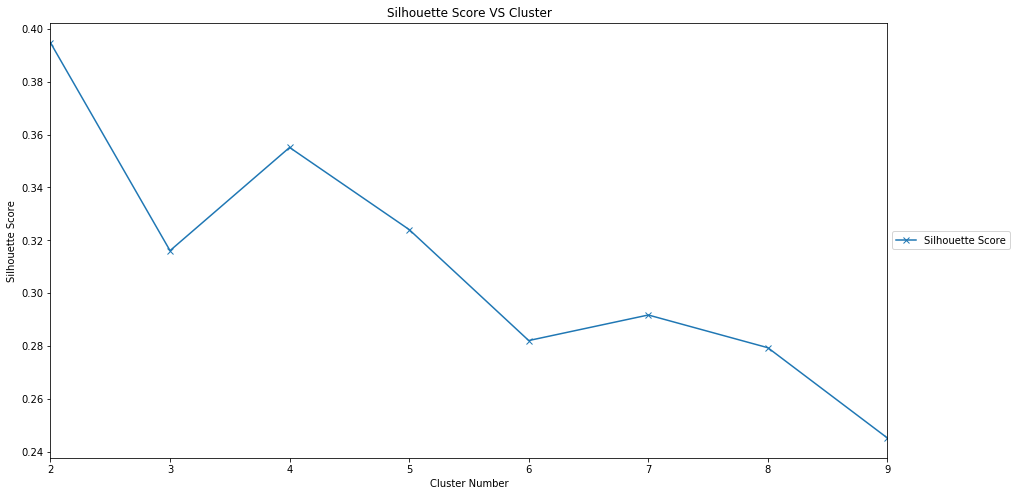

In [53]:
k = range(2,10)
df = pd.DataFrame({'Cluster Number': k,
                   'Silhouette Score': silhouette_score_avg},
                 columns = ['Cluster Number', 'Silhouette Score'])
df.index = df['Cluster Number']
print(df.index.values)

ax = df[['Silhouette Score']].plot(kind='line', title ="Silhouette Score VS Cluster", figsize=(15, 8), legend=True, fontsize=10, style='x-')
ax.set_xlabel("Cluster Number", fontsize=10)
ax.set_ylabel("Silhouette Score", fontsize=10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.1, p.get_height() * 1.02))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

fig = ax.get_figure()
fig.savefig('Silhouette VS Cluster.png')
